# Bolt Efficient supply allocation Task

- Ahmed Umar Ekele

## Introduction

The goal of this notebook is to evaluate & determine an efficient supply allocation for Bolt ride-hailing app.
We seek to determine optimal demand times for ride & also location-based. I will seek to categorize the provided March month data for rides in Tallinn, Estonia.

Additional data included in this notebook include a shp file of the administrative boundaries of Estonia

In [ ]:
# importing necessary libraries

import numpy as np
import pandas as pd
import warnings
import numpy as np
from datetime import timedelta
from datetime import datetime

%matplotlib inline
import matplotlib.pyplot as plt

Loading in the data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
uploaded = "/content/gdrive/My Drive/robotex5.csv"

Creating new dataframe

In [ ]:
df = pd.read_csv(uploaded)
df.head()


,start_time,start_lat,start_lng,end_lat,end_lng,ride_value
0,2022-03-06 15:02:39.329452000,59.407910,24.689836,59.513027,24.831630,3.51825
1,2022-03-10 11:15:55.177526000,59.441650,24.762712,59.426450,24.783076,0.50750
2,2022-03-06 14:23:33.893257000,59.435404,24.749795,59.431901,24.761588,0.19025
3,2022-03-03 09:11:59.104192000,59.406920,24.659006,59.381093,24.641652,0.75600
4,2022-03-06 00:13:01.290346000,59.434940,24.753641,59.489203,24.876170,2.27100


In [ ]:
df.dtypes

start_time     object
start_lat     float64
start_lng     float64
end_lat       float64
end_lng       float64
ride_value    float64
dtype: object

## Data Preprocessing

Converting the start time column into date time format. Sorting data according to time/date

In [ ]:
#df['start_time'] = df['start_time'].apply(pd.to_datetime)

df["start_time_new"] = np.nan

# for requests
for i in range(len(df)):
    # removing the extra decimal seconds
    df["start_time_new"][i] =  df["start_time"][i][11:-10]

    # Convert to datetime
    df["start_time_new"][i] = datetime.strptime(str(df["start_time_new"][i]), "%H:%M:%S")


df.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,start_time,start_lat,start_lng,end_lat,end_lng,ride_value,start_time_new
0,2022-03-06 15:02:39.329452000,59.407910,24.689836,59.513027,24.831630,3.51825,1900-01-01 15:02:39
1,2022-03-10 11:15:55.177526000,59.441650,24.762712,59.426450,24.783076,0.50750,1900-01-01 11:15:55
2,2022-03-06 14:23:33.893257000,59.435404,24.749795,59.431901,24.761588,0.19025,1900-01-01 14:23:33


We will create a new set of dataframe based on the start time
that splits into hourly, minute, daily etc. time periods can be amended according to users interest to investigate :)

In [ ]:
# Sorting new dataframe for the times ## 12 midnight - 1am hour duration from the start_time

start_time_df = df[(df['start_time_new'] > (datetime(1900, 1, 1, 0, 0, 0)))  & (df['start_time_new'] < datetime(1900, 1, 1, 1, 00, 00))]
start_time_df

,start_time,start_lat,start_lng,end_lat,end_lng,ride_value,start_time_new
4,2022-03-06 00:13:01.290346000,59.434940,24.753641,59.489203,24.876170,2.271000,1900-01-01 00:13:01
14,2022-03-02 00:22:00.527692000,59.507679,24.830003,59.444352,24.751307,2.068750,1900-01-01 00:22:00
28,2022-03-18 00:08:46.227472000,59.435202,24.822140,59.422603,24.737393,1.226500,1900-01-01 00:08:46
32,2022-03-01 00:31:59.484896000,59.397316,24.686087,59.448172,24.736754,1.576500,1900-01-01 00:31:59
68,2022-03-10 00:21:58.772618000,59.425364,24.718524,59.432899,24.765493,0.684250,1900-01-01 00:21:58
...,...,...,...,...,...,...,...
627037,2022-03-13 00:07:56.615231000,59.434052,24.744599,59.402714,24.686546,1.185250,1900-01-01 00:07:56
627055,2022-03-04 00:46:44.154169000,59.434094,24.721253,59.432605,24.769900,0.676000,1900-01-01 00:46:44
627127,2022-03-21 00:38:13.211000000,59.404804,24.684307,59.427863,24.743682,1.035632,1900-01-01 00:38:13
627186,2022-03-15 00:19:14.044427000,59.433043,24.744812,59.421431,24.801424,0.849000,1900-01-01 00:19:14


Viewing the new start_time in date time format




In [ ]:
df['start_time_new'][1]

datetime.datetime(1900, 1, 1, 11, 15, 55)

##Creation of map grids

In [ ]:
%%time

# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal
# Install rtree - Geopandas requirment
!apt install python3-rtree
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express

In [ ]:
pip install geopandas

In [ ]:
#!pip install git+git://github.com/geopandas/geopandas.git

import geopandas as gpd
import codecs

from shapely.geometry import Point, LineString, Polygon
import shapely

Converting into geodataframe

In [ ]:
# Zipping the geometry in this case point geometry
df['geometry']  = list(zip(df['start_lng'], df['start_lat']))

#This applies point to the geometry
df['geometry'] = df['geometry'].apply(Point)

gdf = gpd.GeoDataFrame(df, geometry='geometry')
gdf.head()

,start_time,start_lat,start_lng,end_lat,end_lng,ride_value,start_time_new,geometry
0,2022-03-06 15:02:39.329452000,59.407910,24.689836,59.513027,24.831630,3.51825,1900-01-01 15:02:39,POINT (24.68984 59.40791)
1,2022-03-10 11:15:55.177526000,59.441650,24.762712,59.426450,24.783076,0.50750,1900-01-01 11:15:55,POINT (24.76271 59.44165)
2,2022-03-06 14:23:33.893257000,59.435404,24.749795,59.431901,24.761588,0.19025,1900-01-01 14:23:33,POINT (24.74980 59.43540)
3,2022-03-03 09:11:59.104192000,59.406920,24.659006,59.381093,24.641652,0.75600,1900-01-01 09:11:59,POINT (24.65901 59.40692)
4,2022-03-06 00:13:01.290346000,59.434940,24.753641,59.489203,24.876170,2.27100,1900-01-01 00:13:01,POINT (24.75364 59.43494)


importing shp file of Estonia admin bounds

In [ ]:
estonia = "/content/gdrive/MyDrive/EST_adm/EST_adm2.shp"

In [ ]:
est = gpd.read_file(estonia)
est

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
0,73,EST,Estonia,1,Harju,1,Aegviidu\r\n,Vald,Parish,None,None,"POLYGON ((25.65937 59.26685, 25.65898 59.26664..."
1,73,EST,Estonia,1,Harju,2,Anija,Vald,Parish,None,None,"POLYGON ((25.53381 59.42738, 25.53307 59.42535..."
2,73,EST,Estonia,1,Harju,3,Harku,Vald,Parish,None,None,"MULTIPOLYGON (((24.61842 59.37421, 24.61762 59..."
3,73,EST,Estonia,1,Harju,4,Jõelähtme,Vald,Parish,None,None,"MULTIPOLYGON (((25.06765 59.50373, 25.06774 59..."
4,73,EST,Estonia,1,Harju,5,Kõue,Vald,Parish,None,None,"POLYGON ((25.32330 59.20629, 25.32425 59.20554..."
...,...,...,...,...,...,...,...,...,...,...,...,...
218,73,EST,Estonia,16,Viljandi,219,Suure-Jaani\r\n,Vald,Parish,None,None,"POLYGON ((25.52414 58.63092, 25.52570 58.62733..."
219,73,EST,Estonia,16,Viljandi,220,Tarvastu,Vald,Parish,None,None,"MULTIPOLYGON (((26.05909 58.20230, 26.05914 58..."
220,73,EST,Estonia,16,Viljandi,221,Võhma,Linn,Town,None,None,"POLYGON ((25.56278 58.62331, 25.56020 58.62326..."
221,73,EST,Estonia,16,Viljandi,222,Viiratsi,Vald,Parish,None,None,"POLYGON ((25.85631 58.45575, 25.85813 58.45569..."


The AOI is Tallinn - Capital city of Estonia. It is in the Harju county of the country.
Selecting the from NAME_2 column in dataframe that matches 'Tallinn'

In [ ]:
est_tallinn = est[est['NAME_2'] == "Tallinn" ]
est_tallinn

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
19,73,EST,Estonia,1,Harju,20,Tallinn,Linn,Town,None,None,"MULTIPOLYGON (((24.75146 59.45117, 24.75154 59..."


In [ ]:
#est['NAME_2'].unique()

Creation of map grids, assigning proper projection (WGS84)

In [ ]:
pip install contextily

xmin, ymin, xmax, ymax= gdf.total_bounds
# how many cells across and down

#n_cells=30
# cell_size = (xmax-xmin)/n_cells

cell_size = 0.02
# projection of the grid
crs = {'init': 'epsg:4326'}
# create the cells in a loop
grid_cells = []
for x0 in np.arange(xmin, xmax+cell_size, cell_size ):
    for y0 in np.arange(ymin, ymax+cell_size, cell_size):
        # bounds
        x1 = x0-cell_size
        y1 = y0+cell_size
        grid_cells.append( shapely.geometry.box(x0, y0, x1, y1)  )
cell = gpd.GeoDataFrame(grid_cells, columns=['geometry'],
                                 crs=crs)

Visualize the new Tallinn plot

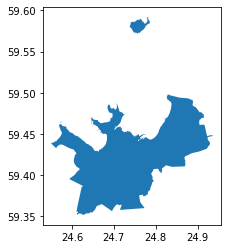

In [ ]:
est_tallinn.plot()

Finding intersects between the ride start locations (using the start lat) and tallinn grids

In [ ]:
est_tallinn = est_tallinn.to_crs(cell.crs)

from sympy import Point, Polygon
cell["Tallinn"] = np.nan
for i in range(len(cell)):
  if (est_tallinn["geometry"][19]).intersection(cell["geometry"][i]):
    cell["Tallinn"][i] = "Yes"

cell_new = cell[cell["Tallinn"] == "Yes"]
cell_new = cell_new.reset_index()
cell_new

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,index,geometry,Tallinn
0,47,"POLYGON ((24.54520 59.42156, 24.54520 59.44156...",Yes
1,48,"POLYGON ((24.54520 59.44156, 24.54520 59.46156...",Yes
2,61,"POLYGON ((24.56520 59.42156, 24.56520 59.44156...",Yes
3,62,"POLYGON ((24.56520 59.44156, 24.56520 59.46156...",Yes
4,63,"POLYGON ((24.56520 59.46156, 24.56520 59.48156...",Yes
...,...,...,...
106,299,"POLYGON ((24.90520 59.42156, 24.90520 59.44156...",Yes
107,300,"POLYGON ((24.90520 59.44156, 24.90520 59.46156...",Yes
108,301,"POLYGON ((24.90520 59.46156, 24.90520 59.48156...",Yes
109,313,"POLYGON ((24.92520 59.42156, 24.92520 59.44156...",Yes


(24.530878925323485, 24.95530233383179, 59.33982219696051, 59.603563880920404)

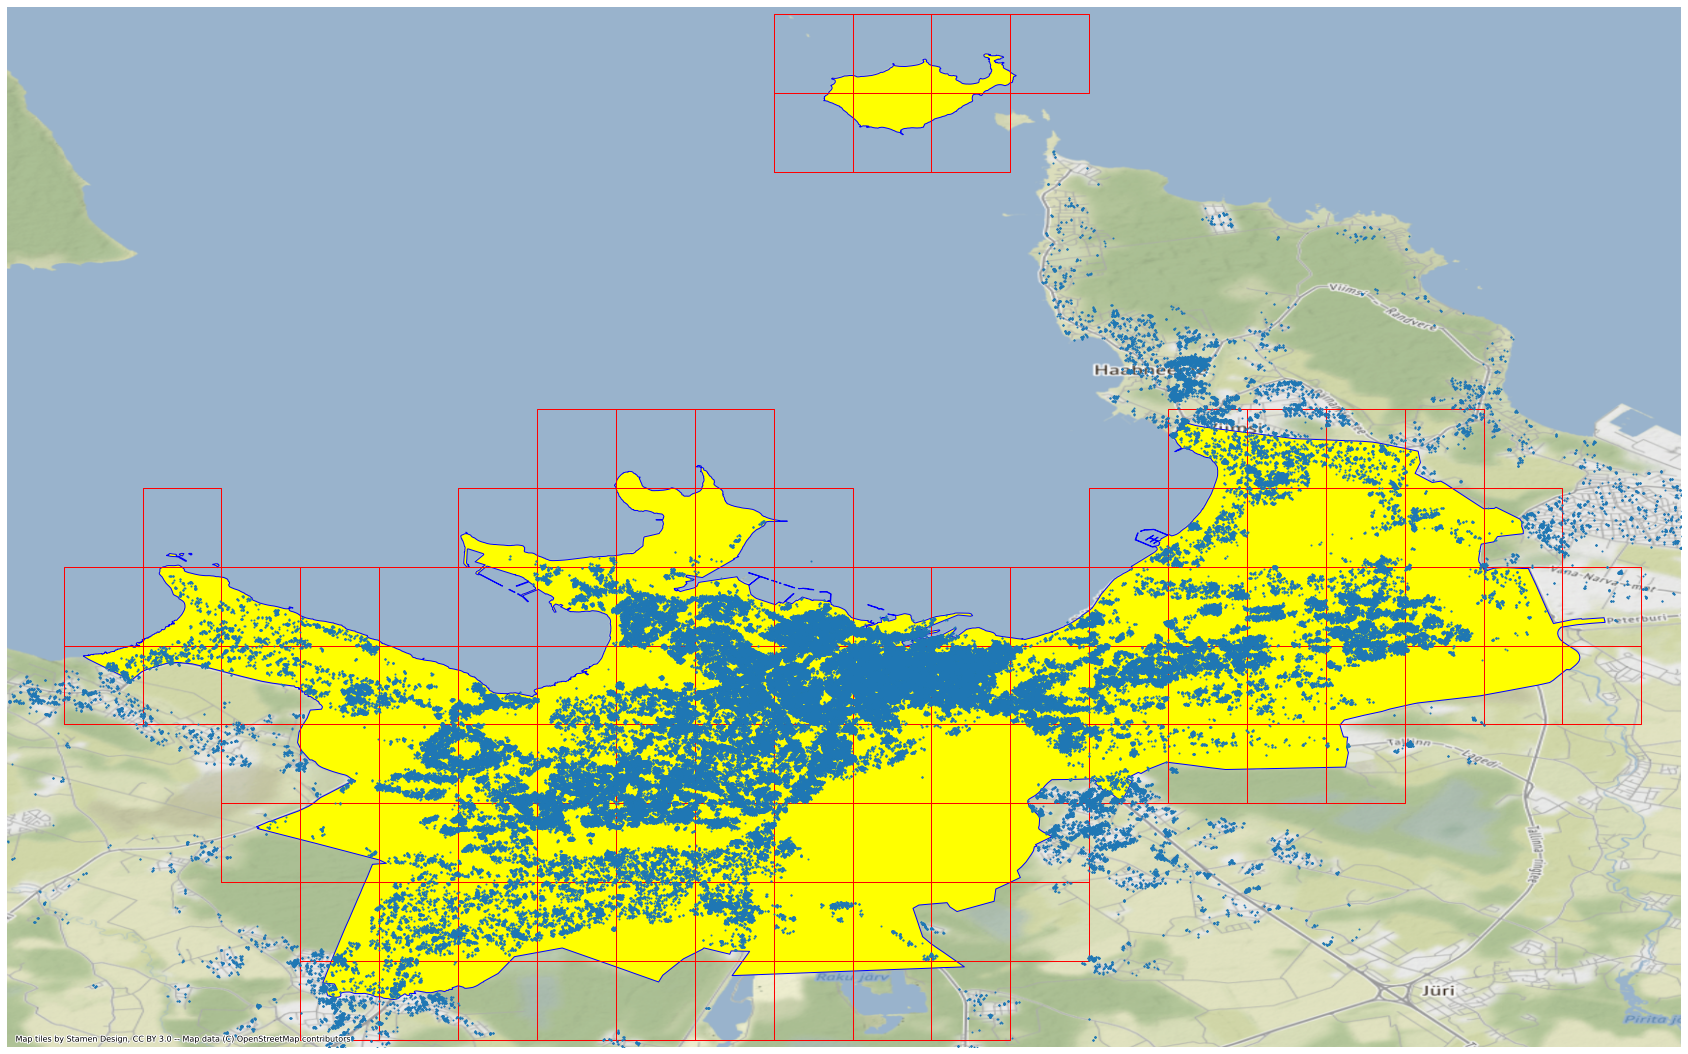

In [ ]:
import contextily as ctx

ax = est_tallinn.plot(facecolor="yellow", edgecolor='blue',  figsize=(30, 22))
plt.autoscale(False)
cell_new.plot(ax=ax, facecolor="none", edgecolor='red')
gdf.plot(ax = ax, markersize = 1)
ctx.add_basemap(ax, crs = crs, url = ctx.providers.OpenStreetMap.Mapnik)
ax.axis("off")

The map image above shows the areas in Talliinn that had requests for rides and vice-versa

In [ ]:
cell["Tallinn"].unique()

array([nan, 'Yes'], dtype=object)

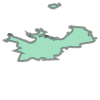

In [ ]:
est_tallinn["geometry"][19]

Assigning ID to the geometries of the new index for the dataframe 'cell_new'

In [ ]:
cell_new["ID"] = cell_new.index
cell_new

,index,geometry,Tallinn,ID
0,47,"POLYGON ((24.54520 59.42156, 24.54520 59.44156...",Yes,0
1,48,"POLYGON ((24.54520 59.44156, 24.54520 59.46156...",Yes,1
2,61,"POLYGON ((24.56520 59.42156, 24.56520 59.44156...",Yes,2
3,62,"POLYGON ((24.56520 59.44156, 24.56520 59.46156...",Yes,3
4,63,"POLYGON ((24.56520 59.46156, 24.56520 59.48156...",Yes,4
...,...,...,...,...
106,299,"POLYGON ((24.90520 59.42156, 24.90520 59.44156...",Yes,106
107,300,"POLYGON ((24.90520 59.44156, 24.90520 59.46156...",Yes,107
108,301,"POLYGON ((24.90520 59.46156, 24.90520 59.48156...",Yes,108
109,313,"POLYGON ((24.92520 59.42156, 24.92520 59.44156...",Yes,109


Creation of a new geodataframe that contains the areas in the Tallinn map and the number of pickup requests in those locations  

In [ ]:
gdf = gdf.reset_index()
gdf["cell"] = np.nan
for i in range(len(gdf)):
  for j in range(len(cell_new)):
    if gdf["geometry"][i].intersection(cell_new["geometry"][j]):
      gdf["cell"][i] = cell_new["ID"][j]

gdf.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,index,start_time,start_lat,start_lng,end_lat,end_lng,ride_value,start_time_new,geometry,cell
0,0,2022-03-06 15:02:39.329452000,59.407910,24.689836,59.513027,24.831630,3.51825,1900-01-01 15:02:39,POINT (24.68984 59.40791),39.0
1,1,2022-03-10 11:15:55.177526000,59.441650,24.762712,59.426450,24.783076,0.50750,1900-01-01 11:15:55,POINT (24.76271 59.44165),66.0
2,2,2022-03-06 14:23:33.893257000,59.435404,24.749795,59.431901,24.761588,0.19025,1900-01-01 14:23:33,POINT (24.74980 59.43540),65.0
3,3,2022-03-03 09:11:59.104192000,59.406920,24.659006,59.381093,24.641652,0.75600,1900-01-01 09:11:59,POINT (24.65901 59.40692),24.0
4,4,2022-03-06 00:13:01.290346000,59.434940,24.753641,59.489203,24.876170,2.27100,1900-01-01 00:13:01,POINT (24.75364 59.43494),65.0


In [ ]:
# Export as geopackage/shapefile

#import fiona
#gdf.to_file("countries.shp")


In [ ]:
## viewing the cell column count in the geodataframe
gdf["cell"].nunique()

93

In [ ]:
# Grouping the geodataframe by 'cell/grid' number
gdf_cell = gdf.groupby(['cell']).count()

gdf_cell = gdf_cell.reset_index()

In [ ]:
gdf_cell

,cell,index,start_time,start_lat,start_lng,end_lat,end_lng,ride_value,start_time_new,geometry
0,0.0,952,952,952,952,952,952,952,952,952
1,2.0,772,772,772,772,772,772,772,772,772
2,3.0,456,456,456,456,456,456,456,456,456
3,5.0,47,47,47,47,47,47,47,47,47
4,6.0,435,435,435,435,435,435,435,435,435
...,...,...,...,...,...,...,...,...,...,...
88,105.0,331,331,331,331,331,331,331,331,331
89,106.0,2,2,2,2,2,2,2,2,2
90,107.0,403,403,403,403,403,403,403,403,403
91,108.0,638,638,638,638,638,638,638,638,638


In [ ]:
# Sorting the cell columan in descending order
gdf_cell.sort_values('index', ascending = False)

,cell,index,start_time,start_lat,start_lng,end_lat,end_lng,ride_value,start_time_new,geometry
54,65.0,128146,128146,128146,128146,128146,128146,128146,128146,128146
49,56.0,63685,63685,63685,63685,63685,63685,63685,63685,63685
59,73.0,53043,53043,53043,53043,53043,53043,53043,53043,53043
43,48.0,30560,30560,30560,30560,30560,30560,30560,30560,30560
48,55.0,24614,24614,24614,24614,24614,24614,24614,24614,24614
...,...,...,...,...,...,...,...,...,...,...
39,44.0,13,13,13,13,13,13,13,13,13
25,28.0,8,8,8,8,8,8,8,8,8
24,27.0,8,8,8,8,8,8,8,8,8
89,106.0,2,2,2,2,2,2,2,2,2


Reassigning the geodataframe with only the index & cell columns


In [ ]:
gdf_cell = gdf_cell[['index', 'cell']]

In [ ]:
gdf_cell

,index,cell
0,952,0.0
1,772,2.0
2,456,3.0
3,47,5.0
4,435,6.0
...,...,...
88,331,105.0
89,2,106.0
90,403,107.0
91,638,108.0


In [ ]:
# Renaming index column in the geodataframe

gdf_cell.rename(columns = {'index':'pick_up_count', 'cell': 'ID'}, inplace = True)
gdf_cell.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,pick_up_count,ID
0,952,0.0
1,772,2.0
2,456,3.0
3,47,5.0
4,435,6.0


Joining the geodataframes cell_new & gdf_cell using the pick_up_count and ID columns

In [ ]:
cell_new

,index,geometry,Tallinn,ID
0,47,"POLYGON ((24.54520 59.42156, 24.54520 59.44156...",Yes,0
1,48,"POLYGON ((24.54520 59.44156, 24.54520 59.46156...",Yes,1
2,61,"POLYGON ((24.56520 59.42156, 24.56520 59.44156...",Yes,2
3,62,"POLYGON ((24.56520 59.44156, 24.56520 59.46156...",Yes,3
4,63,"POLYGON ((24.56520 59.46156, 24.56520 59.48156...",Yes,4
...,...,...,...,...
106,299,"POLYGON ((24.90520 59.42156, 24.90520 59.44156...",Yes,106
107,300,"POLYGON ((24.90520 59.44156, 24.90520 59.46156...",Yes,107
108,301,"POLYGON ((24.90520 59.46156, 24.90520 59.48156...",Yes,108
109,313,"POLYGON ((24.92520 59.42156, 24.92520 59.44156...",Yes,109


In [ ]:
# joining
hour_0_1 =  pd.merge(cell_new, gdf_cell, on='ID', how='outer')

display(hour_0_1)

,index,geometry,Tallinn,ID,pick_up_count
0,47,"POLYGON ((24.54520 59.42156, 24.54520 59.44156...",Yes,0,952.0
1,48,"POLYGON ((24.54520 59.44156, 24.54520 59.46156...",Yes,1,NaN
2,61,"POLYGON ((24.56520 59.42156, 24.56520 59.44156...",Yes,2,772.0
3,62,"POLYGON ((24.56520 59.44156, 24.56520 59.46156...",Yes,3,456.0
4,63,"POLYGON ((24.56520 59.46156, 24.56520 59.48156...",Yes,4,NaN
...,...,...,...,...,...
106,299,"POLYGON ((24.90520 59.42156, 24.90520 59.44156...",Yes,106,2.0
107,300,"POLYGON ((24.90520 59.44156, 24.90520 59.46156...",Yes,107,403.0
108,301,"POLYGON ((24.90520 59.46156, 24.90520 59.48156...",Yes,108,638.0
109,313,"POLYGON ((24.92520 59.42156, 24.92520 59.44156...",Yes,109,NaN


Finding location of the areas with higher pickups

In [ ]:
hour_0_1.sort_values('pick_up_count', ascending = False)

,index,geometry,Tallinn,ID,pick_up_count
65,187,"POLYGON ((24.74520 59.42156, 24.74520 59.44156...",Yes,65,128146.0
56,173,"POLYGON ((24.72520 59.42156, 24.72520 59.44156...",Yes,56,63685.0
73,201,"POLYGON ((24.76520 59.42156, 24.76520 59.44156...",Yes,73,53043.0
48,159,"POLYGON ((24.70520 59.42156, 24.70520 59.44156...",Yes,48,30560.0
55,172,"POLYGON ((24.72520 59.40156, 24.72520 59.42156...",Yes,55,24614.0
...,...,...,...,...,...
71,199,"POLYGON ((24.76520 59.38156, 24.76520 59.40156...",Yes,71,NaN
75,208,"POLYGON ((24.76520 59.56156, 24.76520 59.58156...",Yes,75,NaN
76,209,"POLYGON ((24.76520 59.58156, 24.76520 59.60156...",Yes,76,NaN
82,223,"POLYGON ((24.78520 59.58156, 24.78520 59.60156...",Yes,82,NaN


The resulting table above shows the top map grid areas for ride pick-ups & NaN showing no pickups occured in these other zones.

### Visualizing/Plotting the heat map of the prime ride pick-up locations from the grids

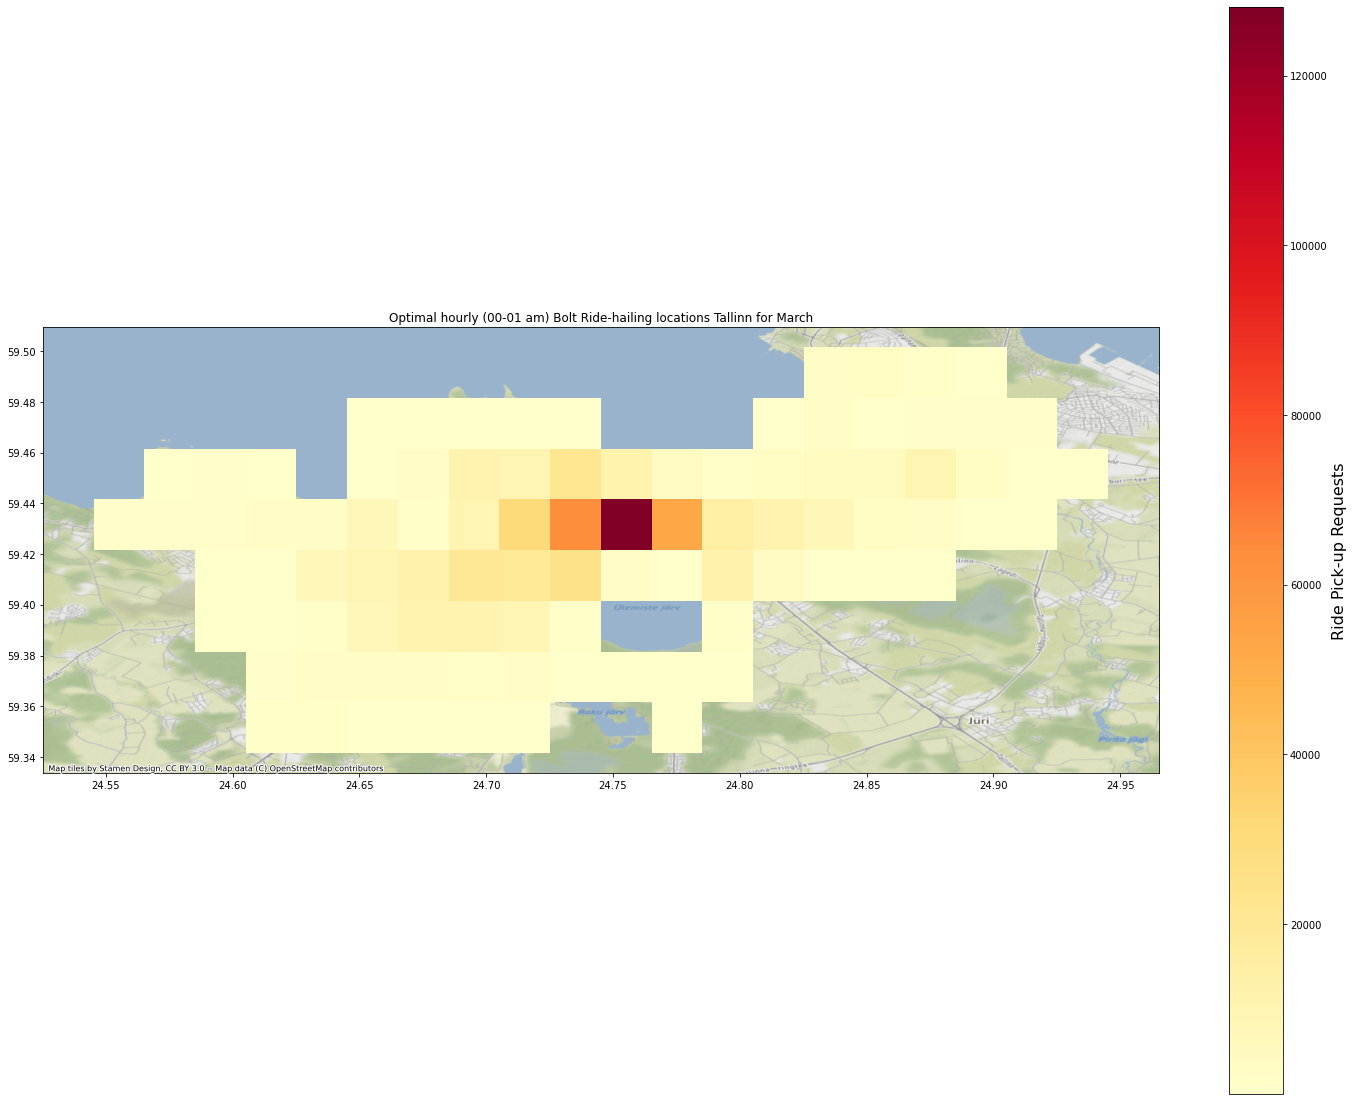

In [ ]:
import matplotlib.colors as colors

norm = colors.Normalize(vmin= hour_0_1["pick_up_count"].min(), vmax=hour_0_1["pick_up_count"].max())
cbar = plt.cm.ScalarMappable(norm=norm, cmap='YlOrRd')

# plotting
fig, ax = plt.subplots(figsize=(25, 20))
# with no normalization
hour_0_1.plot(column='pick_up_count', cmap='YlOrRd', legend=False, ax=ax , alpha = 1.0)

# add colorbar
ax_cbar = fig.colorbar(cbar, ax=ax)

# add label for the colorbar
plt.title('Optimal hourly (00-01 am) Bolt Ride-hailing locations Tallinn for March')
ax_cbar.set_label( 'Ride Pick-up Requests', fontsize = 16,)
ctx.add_basemap(ax, crs = hour_0_1.crs)

This map above shows the prime/optimal demand areas for Bolt ride-hailing app pick up requests in Tallinn, Estonia for the hours between 12 midnight & 1am (EEST) for the month of March. It could that area(s) of Tallinn has an active/vibrant nightscene.

This is under: POLYGON ((24.745199098293398 59.42155738688773, 24.745199098293398 59.44155738688773, 24.765199098293397 59.44155738688773, 24.765199098293397 59.42155738688773, 24.745199098293398 59.42155738688773)) which coordinates translates to areas mostly within the Kesklinn district.

# Conclusion

From the concluded analysis, we find that focusing more drivers towards the Kesklinn district of Tallinn would be best to fulfil rider riders demands for the hours 12 mindnight to 1am based on the March 2022 data.

Results anaylsis may also vary based on the selected hourly time period as well


- Ahmed Umar Ekele

## References

Estonia shape file: https://biogeo.ucdavis.edu/data/diva/adm/EST_adm.*zip*

## Annex

The resulting work has been compiled into a function below that can be tweaked for other periods.

In [ ]:
## This is the function from the line of codes compiled from the notebook

## Data Preprocessing
#Converting the start time column into date time format. Sorting data according to time/date

#df['start_time'] = df['start_time'].apply(pd.to_datetime)

## Map Grid Creation

estonia = "/content/gdrive/MyDrive/EST_adm/EST_adm2.shp"

%%time

# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal
# Install rtree - Geopandas requirment
!apt install python3-rtree
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express

!pip install geopandas

#!pip install git+git://github.com/geopandas/geopandas.git

def bolt_ride(df, start_time, end_time, estonia):

    df["start_time_new"] = np.nan
    # for requests
    for i in range(len(df)):

    # removing the extra decimal seconds
        df["start_time_new"][i] =  df["start_time"][i][11:-10]

        # Convert to datetime
        df["start_time_new"][i] = datetime.strptime(str(df["start_time_new"][i]), "%H:%M:%S")



        # Sorting new dataframe for the times ## 13 - 14 hour duration from the start_time
        start_time_df = df[(df['start_time_new'] > (start_time))  & (df['start_time_new'] < end_time)]



        import geopandas as gpd
        import codecs

        from shapely.geometry import Point, LineString, Polygon
        import shapely

        ## converting into geodataframe

        # Zipping the geometry in this case point geometry
        df['geometry']  = list(zip(df['start_lng'], df['start_lat']))

        #This applies point to the geometry
        df['geometry'] = df['geometry'].apply(Point)

        gdf = gpd.GeoDataFrame(df, geometry='geometry')



        est = gpd.read_file(estonia)

        ## extracting Tallinn admin bounds from Estonia shp file

        est_tallinn = est[est['NAME_2'] == "Tallinn" ]

        #est['NAME_2'].unique()


        ## Creation of map grids, assigning proper projection (WGS84)
        !pip install contextily

        xmin, ymin, xmax, ymax= gdf.total_bounds
        # how many cells across and down

        #n_cells=30
        # cell_size = (xmax-xmin)/n_cells

        cell_size = 0.02
        # projection of the grid
        crs = {'init': 'epsg:4326'}
        # create the cells in a loop
        grid_cells = []
        for x0 in np.arange(xmin, xmax+cell_size, cell_size ):
            for y0 in np.arange(ymin, ymax+cell_size, cell_size):
                # bounds
                x1 = x0-cell_size
                y1 = y0+cell_size
                grid_cells.append( shapely.geometry.box(x0, y0, x1, y1)  )
        cell = gpd.GeoDataFrame(grid_cells, columns=['geometry'],
                                        crs=crs)

        est_tallinn = est_tallinn.to_crs(cell.crs)

        from sympy import Point, Polygon
        cell["Tallinn"] = np.nan
        for i in range(len(cell)):
            if (est_tallinn["geometry"][19]).intersection(cell["geometry"][i]):
                cell["Tallinn"][i] = "Yes"

        cell_new = cell[cell["Tallinn"] == "Yes"]
        cell_new = cell_new.reset_index()

        ## visualizing the grid map
        import contextily as ctx


        cell_new["ID"] = cell_new.index

        ##Creation of a new geodataframe that contains the areas in the Tallinn map and the number of pickup requests in those locations


        gdf = gdf.reset_index()
        gdf["cell"] = np.nan
        for i in range(len(gdf)):
            for j in range(len(cell_new)):
                if gdf["geometry"][i].intersection(cell_new["geometry"][j]):
                    gdf["cell"][i] = cell_new["ID"][j]


        # Grouping the geodataframe by 'cell/grid' number
        gdf_cell = gdf.groupby(['cell']).count()

        gdf_cell = gdf_cell.reset_index()



        ## Reassigning the geodataframe with only the index & cell columns

        gdf_cell = gdf_cell[['index', 'cell']]


        # Renaming index column in the geodataframe

        gdf_cell = gdf_cell.rename(columns = {'index':'pick_up_count', 'cell': 'ID'}, inplace = True)


        # joining
        hour_0_1 =  pd.merge(cell_new, gdf_cell, on='ID', how='outer')


        ### Visualizing/Plotting the heat map of the prime ride pick-up locations from the grids

        import matplotlib.colors as colors

        norm = colors.Normalize(vmin= hour_0_1["pick_up_count"].min(), vmax=hour_0_1["pick_up_count"].max())
        cbar = plt.cm.ScalarMappable(norm=norm, cmap='YlOrRd')

        # plotting
        fig, ax = plt.subplots(figsize=(25, 20))
        # with no normalization
        hour_0_1.plot(column='pick_up_count', cmap='YlOrRd', legend=False, ax=ax , alpha = 1.0)

        # add colorbar
        ax_cbar = fig.colorbar(cbar, ax=ax)

        # add label for the colorbar
        plt.title('Optimal hourly Bolt Ride-hailing locations Tallinn')
        ax_cbar.set_label( 'Ride Pick-up Requests', fontsize = 16,)
        ctx.add_basemap(ax, crs = hour_0_1.crs)

        return hour_0_1, ax

bolt_ride(df, datetime(1900, 1, 1, 13, 0, 0), datetime(1900, 1, 1, 14, 0, 0), estonia)